In [2]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
country = 'United States'
df_US = df[df['job_country'] == country].copy()
df_skills = df_US.explode("job_skills")

df_skill_count = df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name ='skill_count')
df_skill_count.sort_values(by = 'skill_count', ascending = False, inplace = True)
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

df_skill_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


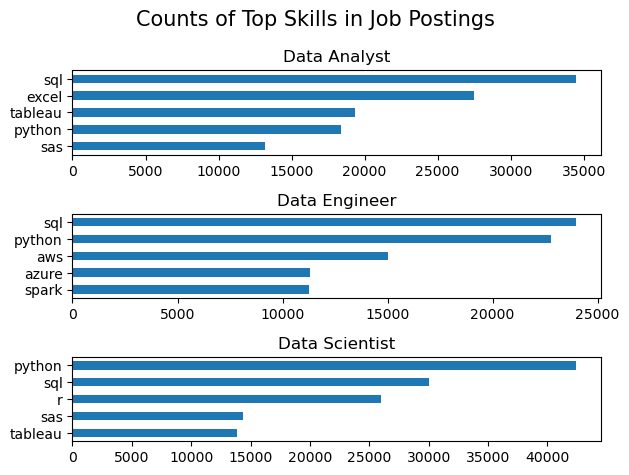

In [4]:
fig,ax = plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

In [5]:
df_job_title_count= df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')
df_skill_pct = pd.merge(df_skill_count, df_job_title_count, how = 'left', on = 'job_title_short')
df_skill_pct['skill_pct'] = 100 * df_skill_pct['skill_count']/df_skill_pct['jobs_total']

df_skill_pct

,job_skills,job_title_short,skill_count,jobs_total,skill_pct
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


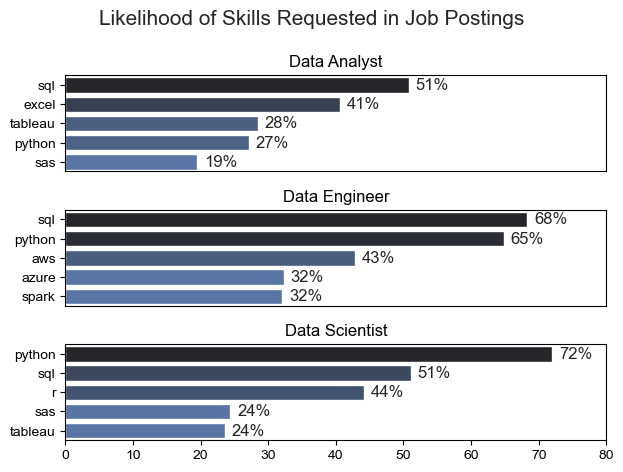

In [6]:
fig,ax = plt.subplots(len(job_titles),1)

sns.set_theme(style = 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_pct[df_skill_pct['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_pct', ax=ax[i], title=job_title)
    sns.barplot(data = df_plot, x = 'skill_pct', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,80)
    ax[i].legend().set_visible(False)

    for index, pct in enumerate(df_plot['skill_pct']):
        ax[i].text(pct+1 ,index, f'{pct:.0f}%', va = 'center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()